## Importy


In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import tree
import pickle

## Przygotowanie danych

In [3]:
data = pd.read_csv('Heart Prediction Quantum Dataset.csv')
data = data.drop('QuantumPatternFeature',axis=1)
data

,Age,Gender,BloodPressure,Cholesterol,HeartRate,HeartDisease
0,68,1,105,191,107,1
1,58,0,97,249,89,0
2,44,0,93,190,82,1
3,72,1,93,183,101,1
4,37,0,145,166,103,1
...,...,...,...,...,...,...
495,34,0,126,292,116,0
496,41,0,164,248,114,0
497,45,1,159,175,75,0
498,55,0,107,157,101,1


In [4]:
X = data.drop(labels='HeartDisease',axis=1)
Y = data['HeartDisease']
X = X.to_numpy()
Y = Y.to_numpy()
X

array([[ 68,   1, 105, 191, 107],
       [ 58,   0,  97, 249,  89],
       [ 44,   0,  93, 190,  82],
       ...,
       [ 45,   1, 159, 175,  75],
       [ 55,   0, 107, 157, 101],
       [ 55,   0, 174, 249,  89]])

## Klasyfikacja

In [5]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.5, random_state=1410)
print(X_train.shape, X_test.shape, Y_train,Y_test)

(250, 5) (250, 5) [0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1
 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0
 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1
 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0] [1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0
 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0
 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1
 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1
 0 0 1 0 0 1 1 1 1 1 0 1

In [16]:
cls = DecisionTreeClassifier(random_state=1410,max_depth=3)
cls.fit(X_train,Y_train)
Y_pred = cls.predict(X_test)
bac = balanced_accuracy_score(Y_test,Y_pred)
bac

np.float64(0.7516666666666667)

[Text(0.5, 0.875, 'x[0] <= 58.5\ngini = 0.48\nsamples = 250\nvalue = [100, 150]'),
 Text(0.25, 0.625, 'x[0] <= 37.5\ngini = 0.481\nsamples = 137\nvalue = [82, 55]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[3] <= 243.5\ngini = 0.327\nsamples = 34\nvalue = [7, 27]'),
 Text(0.0625, 0.125, 'gini = 0.147\nsamples = 25\nvalue = [2, 23]'),
 Text(0.1875, 0.125, 'gini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.375, 0.375, 'x[3] <= 173.0\ngini = 0.396\nsamples = 103\nvalue = [75, 28]'),
 Text(0.3125, 0.125, 'gini = 0.375\nsamples = 16\nvalue = [4, 12]'),
 Text(0.4375, 0.125, 'gini = 0.3\nsamples = 87\nvalue = [71, 16]'),
 Text(0.75, 0.625, 'x[3] <= 248.0\ngini = 0.268\nsamples = 113\nvalue = [18, 95]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= 64.5\ngini = 0.136\nsamples = 82\nvalue = [6, 76]'),
 Text(0.5625, 0.125, 'gini = 0.337\nsamples = 28\nvalue = [6, 22]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 54\nvalue = [0, 54]'),
 Text(0.875, 0.375, 'x[0] <= 7

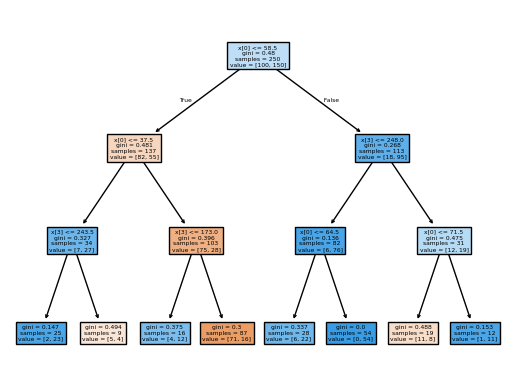

In [13]:
tree.plot_tree(cls,filled=True)

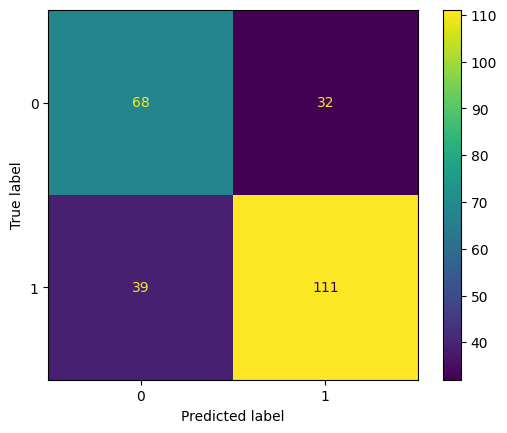

In [8]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,Y_pred))
disp.plot()

In [9]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       100
           1       0.78      0.74      0.76       150

    accuracy                           0.72       250
   macro avg       0.71      0.71      0.71       250
weighted avg       0.72      0.72      0.72       250



jak zmiejszymy tree depth to nasz algorytm lepiej dziala dla ludzi co maja zawal ale nie wplywa na zdrowych

In [10]:
pickle.dump(cls,open('heart.sv','wb'))

In [11]:
loaded_model = pickle.load(open('heart.sv','rb'))
e = loaded_model.predict(X_test)
e

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1])

## KNN